In [ ]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import sys

#定义展示函数
def plot_learning_curvers(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    #显示网格
    plt.grid(True)
    #设置y坐标轴范围
    plt.gca().set_ylim(0,1)
    plt.show()
    


In [ ]:
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
housing = fetch_california_housing()
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data,housing.target,random_state=7)
x_train, x_valid, y_train,y_valid = train_test_split(x_train_all,y_train_all,random_state=11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [ ]:
#函数式API 功能API 
input = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
# 类似于 复合函数 ：f(x) = h(g(x))
#把上面的神经层链接起来
concat = keras.layers.concatenate([input,hidden2])
#创建输出层
output = keras.layers.Dense(1)(concat)
#固化模型
model = keras.models.Model(inputs = [input], outputs = [output])






callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]






#配置培训模型 loss 字符串(目标函数的名称)、目标函数或tf.loss。损失的实例。看到tf.losses。如果模型有多个输出，
#您可以通过传递字典或损失列表，在每个输出上使用不同的损失。由模型最小化的损失值将是所有个人损失的总和。
#optimizers优化器，可以是优化器名称，也可以是实例，优化器来自tf.keras.optimizers.sgd随机梯度下降和动量优化
#metrics计算标签和 预测匹配的频率
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])


In [ ]:
model.summary()

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(patience = 5 ,min_delta = 1e-2)]

In [ ]:
#用到了sklearn的api
from sklearn.preprocessing import StandardScaler 

#初始化一个 scaler对象 
scaler = StandardScaler()
#x_train: [None,28,28] -> [None,784] -> [-1,28,28]
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
#验证集 不需要做fit fit：是在训练集上得到均值和方差 把 均值和方差记录下来 因为做归一化的时候 是需要用训练集的均值和方差去做的 
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
#测试集
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [ ]:
history = model.fit(x_train_scaled,y_train,epochs=10,validation_data = (x_valid_scaled,y_valid),callbacks = callbacks)

# history.history()

plot_learning_curvers(history)

In [ ]:
history = model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=10,callbacks=callbacks)

sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                  

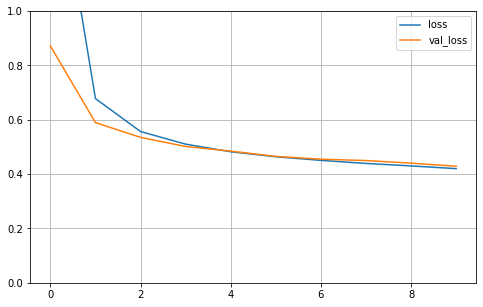

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.43110508835592937

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
#print(tf.__verison__)
print(sys.version_info)
#for module in mpl, np, pd, sklearn, tf, keras:
 #   print(module.__name__,module.__version__)

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data,housing.target,random_state=7)
x_train, x_valid, y_train,y_valid = train_test_split(x_train_all,y_train_all,random_state=11)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

#函数式API 功能API
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='sigmoid')(input)
hidden2 = keras.layers.Dense(30,activation='sigmoid')(hidden1)

concat = keras.layers.concatenate([input,hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input],outputs=[output])

model.summary()
model.compile(loss = "mean_squared_error",optimizer='adam')
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

history = model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=10,callbacks=callbacks)

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

model.evaluate(x_test_scaled,y_test)